In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
import keras

Using Theano backend.


In [3]:
from keras.models import Sequential

In [4]:
model = Sequential()

In [5]:
import glob
from scipy.misc import imsave,imread,imresize

In [6]:
labels = ["A", "L", "R", "T", "W"]
lmap = {}
for i in xrange(5):
    lmap[labels[i]] = i

In [7]:
def get_label(name):
    with open(name[:-3] + "txt", "r") as f:
        fl = f.readlines()[1][-2]
    return lmap.get(fl)

In [8]:
lmap

{'A': 0, 'L': 1, 'R': 2, 'T': 3, 'W': 4}

In [9]:
cv_img = []
cv_label = []
for img in glob.glob("/home/prafulla/Downloads/sd04/png_txt/*/*.png"):
    cv_img.append(imread(img))
    cv_label.append(get_label(img))

In [10]:
cv_label

[4,
 2,
 0,
 2,
 2,
 3,
 3,
 2,
 4,
 4,
 2,
 3,
 0,
 0,
 0,
 4,
 2,
 0,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 1,
 0,
 2,
 4,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 3,
 0,
 2,
 4,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 3,
 3,
 0,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 3,
 4,
 0,
 0,
 3,
 0,
 1,
 2,
 3,
 4,
 2,
 3,
 1,
 0,
 2,
 4,
 2,
 3,
 3,
 4,
 1,
 0,
 0,
 0,
 3,
 2,
 4,
 1,
 1,
 0,
 1,
 2,
 3,
 2,
 4,
 1,
 2,
 3,
 2,
 4,
 1,
 4,
 2,
 1,
 4,
 0,
 3,
 2,
 4,
 3,
 3,
 0,
 4,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 0,
 4,
 1,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 4,
 0,
 0,
 0,
 2,
 2,
 4,
 4,
 3,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 4,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 4,
 4,
 3,
 0,
 0,
 2,
 2,
 0,
 3,
 4,
 2,
 0,
 1,
 0,
 4,
 0,
 3,
 3,
 4,
 4,
 0,
 4,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 3,
 4,
 0,
 2,
 4,
 0,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 3,
 3,
 2,
 1,
 0,
 3,
 0,
 3,
 3,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 4,
 4,
 1,
 2,
 0,
 4,
 3,
 2,
 3,
 2,
 0,
 3,
 1,
 3,


In [11]:
cvi = np.asarray(cv_img)
cvi = cvi[:,:-32,:]
li = np.asarray(cv_label)
print cvi.shape, li.shape

(4000, 480, 512) (4000,)


In [12]:
def contr(im, vmin, vmax):
    im1 = np.clip(im, vmin, vmax)
    return ((im1 - vmin)*1.0/(vmax - vmin))*255.0 

In [13]:
xs = 140
ys = 156

In [14]:
def centrpatch(im, xs = 140, ys = 178, rg = 198, cg = 156):
    return im[xs:xs+rg,ys:ys+cg]

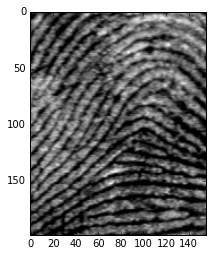

In [15]:
pl.imshow(contr(centrpatch(cvi[12]), 60, 160), cmap=pl.cm.binary)

In [16]:
centres = cvi[:, 140:140+198, 178:178+156]

In [17]:
centres.shape

(4000, 198, 156)

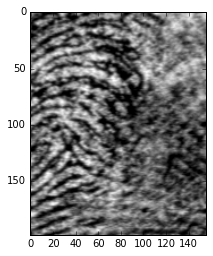

In [18]:
pl.imshow(contr(centres[5], 60, 160), cmap = pl.cm.binary)

In [14]:
pl.imshow(X[14], cmap = pl.cm.binary)

NameError: name 'X' is not defined

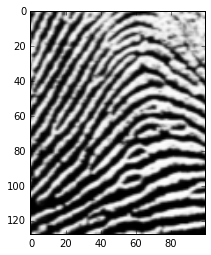

In [23]:
pl.imshow(imresize(contr2(centres[240], 40, 160, 0.06),(128,100)), cmap = pl.cm.binary)

In [21]:
contrasted2 = np.asarray([contr2(centres[i],40,160,0.06) for i in xrange(4000)])

(array([ 17246949.,   9939744.,   7371543.,   5627225.,   4015685.,
          5072960.,   2933893.,   4034486.,   3009812.,   4015168.,
          2906522.,   2930658.,   4072328.,   3649634.,   3836229.,
          4794322.,   4286909.,   6655595.,   9741915.,  17410423.]),
 array([   0.6305189 ,   13.34782741,   26.06513591,   38.78244441,
          51.49975291,   64.21706142,   76.93436992,   89.65167842,
         102.36898692,  115.08629543,  127.80360393,  140.52091243,
         153.23822093,  165.95552944,  178.67283794,  191.39014644,
         204.10745494,  216.82476345,  229.54207195,  242.25938045,
         254.97668895]),
 <a list of 20 Patch objects>)

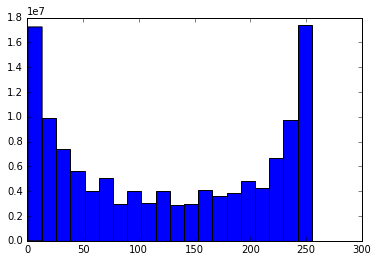

In [22]:
pl.hist(contrasted2.flatten(), bins=20)

(array([  9.47989000e+05,   3.19597600e+06,   6.94400400e+06,
          9.59912100e+06,   1.35775120e+07,   1.52074020e+07,
          1.66071270e+07,   1.56248840e+07,   1.57692210e+07,
          1.53321240e+07,   1.34838370e+07,   1.10686980e+07,
          9.38652800e+06,   6.04038400e+06,   2.79410400e+06,
          8.89168000e+05,   2.88008000e+05,   5.29520000e+04,
          6.95700000e+03,   4.00000000e+00]),
 array([   0.  ,   12.75,   25.5 ,   38.25,   51.  ,   63.75,   76.5 ,
          89.25,  102.  ,  114.75,  127.5 ,  140.25,  153.  ,  165.75,
         178.5 ,  191.25,  204.  ,  216.75,  229.5 ,  242.25,  255.  ]),
 <a list of 20 Patch objects>)

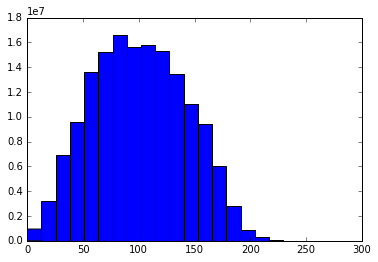

In [85]:
pl.hist(centres.flatten(), bins=20)

In [19]:
def sigmoid(x, k = 1):
    return 1.0/(1.0 + np.exp(-k*x))

def contr2(im, vmin, vmax, k = 1):
    im1 = ((im - (vmin + vmax)/2.0))
    return sigmoid(im1, k)*255

(array([ 16633.,   4519.,   2538.,   2450.,   2150.,   2503.,   2509.,
          2501.,   2273.,   1128.]),
 array([   1.79356472,   26.58288147,   51.37219821,   76.16151495,
         100.95083169,  125.74014844,  150.52946518,  175.31878192,
         200.10809866,  224.89741541,  249.68673215]),
 <a list of 10 Patch objects>)

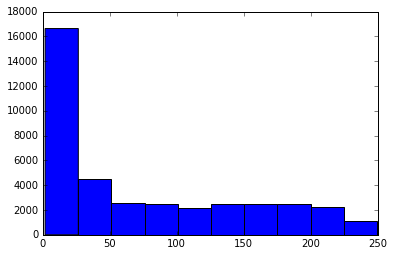

In [17]:
pl.hist(contr2(centres[0], 60, 160, 0.05).flatten())

(array([ 17555.,   2733.,   2611.,   2675.,   2716.,   3045.,   3078.,
          2164.,   1396.,   1231.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

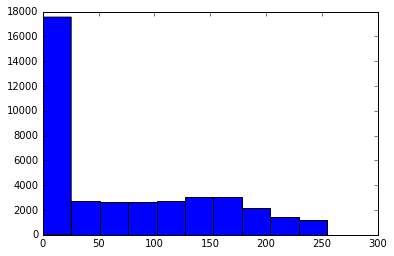

In [105]:
pl.hist(contr(centres[0], 60, 160).flatten())

In [20]:
contrasted2.shape

(4000, 198, 198)

In [24]:
X = np.asarray([imresize(contrasted2[i], (80,64)) for i in xrange(4000)])

In [150]:
4000 * 0.9

3600.0

In [151]:
li[[0,1,3]]

array([4, 2, 2])

In [25]:
full = contrasted2.shape[0]
cut = full * 9 / 10

In [26]:
perm = np.random.permutation(full)
X_train, y_train = X[perm[:cut]], li[perm[:cut]]
X_val, y_val = X[perm[cut:]], li[perm[cut:]]

In [27]:
X_test = X_val
y_test = y_val

In [24]:
print KERAS_BACKEND

NameError: name 'KERAS_BACKEND' is not defined

In [28]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 5
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 80,64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

## the data, shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print 'X_train shape:', X_train.shape
print X_train.shape[0], 'train samples'
print X_test.shape[0], 'test samples'

X_train shape: (3600, 1, 80, 64)
3600 train samples
400 test samples


In [29]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [27]:
Y_train

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [30]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=24,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/24
3600/3600 [==============================] - 37s - loss: 1.5203 - acc: 0.3250 - val_loss: 1.3231 - val_acc: 0.4200
Epoch 2/24
3600/3600 [==============================] - 44s - loss: 1.1569 - acc: 0.5353 - val_loss: 1.0554 - val_acc: 0.5725
Epoch 3/24
3600/3600 [==============================] - 45s - loss: 1.0120 - acc: 0.6103 - val_loss: 0.9722 - val_acc: 0.6050
Epoch 4/24
3600/3600 [==============================] - 42s - loss: 0.9590 - acc: 0.6297 - val_loss: 0.9009 - val_acc: 0.6300
Epoch 5/24
3600/3600 [==============================] - 44s - loss: 0.8889 - acc: 0.6444 - val_loss: 0.8902 - val_acc: 0.6425
Epoch 6/24
3600/3600 [==============================] - 36s - loss: 0.8221 - acc: 0.6792 - val_loss: 0.8332 - val_acc: 0.6600
Epoch 7/24
3600/3600 [==============================] - 36s - loss: 0.7994 - acc: 0.6944 - val_loss: 0.8128 - val_acc: 0.6575
Epoch 8/24
3600/3600 [==============================] - 44s - loss: 0.7

KeyboardInterrupt: 

In [36]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/12
3600/3600 [==============================] - 43s - loss: 1.7361 - acc: 0.2353 - val_loss: 1.6543 - val_acc: 0.2525
Epoch 2/12
3600/3600 [==============================] - 42s - loss: 1.3737 - acc: 0.4311 - val_loss: 1.1622 - val_acc: 0.5200
Epoch 3/12
3600/3600 [==============================] - 51s - loss: 1.1051 - acc: 0.5522 - val_loss: 0.9792 - val_acc: 0.6100
Epoch 4/12
3600/3600 [==============================] - 39s - loss: 1.0059 - acc: 0.5989 - val_loss: 0.9658 - val_acc: 0.6400
Epoch 5/12
3600/3600 [==============================] - 38s - loss: 0.9257 - acc: 0.6361 - val_loss: 0.9435 - val_acc: 0.5975
Epoch 6/12
3600/3600 [==============================] - 38s - loss: 0.8680 - acc: 0.6594 - val_loss: 0.8315 - val_acc: 0.6750
Epoch 7/12
3600/3600 [==============================] - 38s - loss: 0.7859 - acc: 0.6956 - val_loss: 0.8843 - val_acc: 0.6275
Epoch 8/12
3600/3600 [==============================] - 38s - loss: 0.7

In [30]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=5,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/12
3600/3600 [==============================] - 52s - loss: 0.7241 - acc: 0.7147 - val_loss: 0.7758 - val_acc: 0.6925
Epoch 2/12
3600/3600 [==============================] - 52s - loss: 0.7150 - acc: 0.7178 - val_loss: 0.7379 - val_acc: 0.7075
Epoch 3/12
3600/3600 [==============================] - 44s - loss: 0.6613 - acc: 0.7422 - val_loss: 0.7467 - val_acc: 0.7000
Epoch 4/12
3600/3600 [==============================] - 28s - loss: 0.6435 - acc: 0.7450 - val_loss: 0.7611 - val_acc: 0.7025
Epoch 5/12
3600/3600 [==============================] - 28s - loss: 0.6350 - acc: 0.7497 - val_loss: 0.8619 - val_acc: 0.6700
Epoch 6/12
3600/3600 [==============================] - 28s - loss: 0.6484 - acc: 0.7383 - val_loss: 0.7894 - val_acc: 0.6800
Epoch 7/12
3600/3600 [==============================] - 28s - loss: 0.6129 - acc: 0.7564 - val_loss: 0.6985 - val_acc: 0.7175
Epoch 8/12
3600/3600 [==============================] - 29s - loss: 0.5

In [37]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=5,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/5
3600/3600 [==============================] - 43s - loss: 0.6112 - acc: 0.7672 - val_loss: 0.7882 - val_acc: 0.6850
Epoch 2/5
3600/3600 [==============================] - 42s - loss: 0.5883 - acc: 0.7639 - val_loss: 0.7782 - val_acc: 0.6875
Epoch 3/5
3600/3600 [==============================] - 44s - loss: 0.5481 - acc: 0.7836 - val_loss: 0.7927 - val_acc: 0.7125
Epoch 4/5
3600/3600 [==============================] - 46s - loss: 0.5373 - acc: 0.7939 - val_loss: 0.7736 - val_acc: 0.7100
Epoch 5/5
3600/3600 [==============================] - 45s - loss: 0.5156 - acc: 0.8039 - val_loss: 0.7587 - val_acc: 0.7325
('Test score:', 0.7587199521064758)
('Test accuracy:', 0.73250000000000004)


In [31]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.7273986411094665)
('Test accuracy:', 0.70999999999999996)


In [35]:
model.save("big_model.h5")

In [34]:
import h5py

In [80]:
Xi = imread("/home/prafulla/Downloads/tinderprint/identify_2016-09-17_17-13-48_00.bmp")

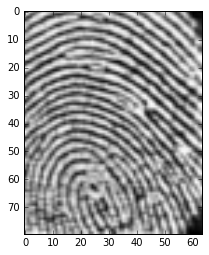

In [81]:
pl.imshow(imresize(Xi[:,15:-15], (80,64)), cmap = pl.cm.binary)

In [82]:
Xir = imresize(Xi[:,15:-15], (80,64))

In [83]:
Xiri = contr2(Xir, 40, 160, 0.04)

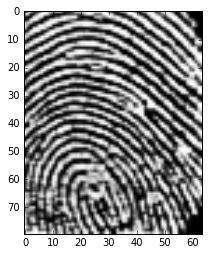

In [84]:
pl.imshow(Xiri, cmap = pl.cm.binary)

In [85]:
Xi = Xiri.reshape(1, 1, 80, 64) / 255

(array([  517.,   433.,   289.,   228.,   211.,   171.,   154.,   133.,
          123.,   111.,   130.,   121.,   134.,   134.,   154.,   176.,
          218.,   256.,   383.,  1044.]),
 array([   4.77016004,   17.25477757,   29.73939511,   42.22401264,
          54.70863018,   67.19324771,   79.67786525,   92.16248278,
         104.64710031,  117.13171785,  129.61633538,  142.10095292,
         154.58557045,  167.07018799,  179.55480552,  192.03942306,
         204.52404059,  217.00865813,  229.49327566,  241.97789319,
         254.46251073]),
 <a list of 20 Patch objects>)

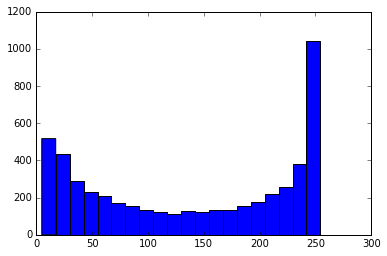

In [86]:
pl.hist(Xiri.flatten(), bins = 20)

In [87]:
model.predict(Xi)

array([[ 0.03347608,  0.03510841,  0.7177012 ,  0.16474858,  0.04896572]], dtype=float32)

In [44]:
model.predict(X_test[1:2])

array([[  4.47527873e-06,   8.54243457e-01,   9.19503577e-07,
          8.68155097e-04,   1.44883022e-01]], dtype=float32)